In [26]:
%cd /content/drive/MyDrive/Agent/TimeSeries

/content/drive/MyDrive/Agent/TimeSeries


# EDA

In [27]:
# # Remove current installations
# !pip uninstall -y numpy scipy pmdarima

# # Install specific compatible versions
# !pip install numpy==1.24.3
# !pip install scipy==1.10.1
# !pip install pmdarima==2.0.3

In [28]:
# !pip install -q prophet

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('mangrove_data_full.csv')

In [31]:
df['date'] = pd.to_datetime(df['date'])

In [32]:
df.head()

,date,tide_verified,wind_speed,turbidity,ndvi
0,2014-05-01,1.24,7.51,2.05,0.23
1,2014-05-02,1.47,6.77,2.06,0.33
2,2014-05-03,1.65,4.80,2.10,0.40
3,2014-05-04,0.87,7.79,2.10,0.65
4,2014-05-05,0.69,8.54,2.24,0.73


In [33]:
df[df['ndvi']<=0.05]

,date,tide_verified,wind_speed,turbidity,ndvi


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           3910 non-null   datetime64[ns]
 1   tide_verified  3910 non-null   float64       
 2   wind_speed     3910 non-null   float64       
 3   turbidity      3910 non-null   float64       
 4   ndvi           3910 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 152.9 KB


In [96]:
ndvi_data = df[['date', 'ndvi']]
display(ndvi_data.info())
display(ndvi_data.head())
display(ndvi_data.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3910 non-null   datetime64[ns]
 1   ndvi    3910 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 61.2 KB


None

,date,ndvi
0,2014-05-01,0.23
1,2014-05-02,0.33
2,2014-05-03,0.40
3,2014-05-04,0.65
4,2014-05-05,0.73


,date,ndvi
3905,2025-02-24,0.36
3906,2025-02-25,0.16
3907,2025-02-26,0.60
3908,2025-02-27,0.53
3909,2025-02-28,0.42


In [36]:
# # Plot the data
# plt.figure(figsize=(12, 6))
# plt.plot(ndvi['date'], ndvi['ndvi'])
# plt.title('NDVI Values Over Time')
# plt.xlabel('Time Index')
# plt.ylabel('NDVI Value')
# plt.grid(True, alpha=0.3)

In [37]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# exog_scaled = scaler.fit_transform(data[['tide_verified', 'wind_speed', 'turbidity']])
# exog_scaled = pd.DataFrame(exog_scaled, index=data.index, columns=['tide_verified', 'wind_speed', 'turbidity'])

# exog_scaled.head()

# SARIMA

In [59]:
# Import packages
import plotly.express as px

# Read in the data
data = pd.read_csv('mangrove_data_full.csv')
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

weekly = data.resample('W').mean().dropna()
monthly = data.resample('ME').mean().dropna()

ndvi_weekly = weekly[['ndvi']]
ndvi_monthly = monthly[['ndvi']]


display(data.head())
display(ndvi_weekly.head())
display(ndvi_monthly.head())

,tide_verified,wind_speed,turbidity,ndvi
date,,,,
2014-05-01,1.24,7.51,2.05,0.23
2014-05-02,1.47,6.77,2.06,0.33
2014-05-03,1.65,4.80,2.10,0.40
2014-05-04,0.87,7.79,2.10,0.65
2014-05-05,0.69,8.54,2.24,0.73


,ndvi
date,
2014-05-04,0.402500
2014-05-11,0.522857
2014-05-18,0.442857
2014-05-25,0.514286
2014-06-01,0.268571


,ndvi
date,
2014-05-31,0.437742
2014-06-30,0.387000
2014-07-31,0.364194
2014-08-31,0.403667
2014-09-30,0.390000


### Weekly

In [60]:
# Split train and test sets
weekly.reset_index(inplace=True)
weekly_train = weekly.iloc[:-int(len(weekly) * 0.2)]
weekly_test = weekly.iloc[-int(len(weekly) * 0.2):]
weekly.set_index('date', inplace=True)

In [61]:
ndvi_train = weekly_train['ndvi']
ndvi_test = weekly_test['ndvi']

display(ndvi_train.head())
display(ndvi_test.head())
display(ndvi_train.info())
display(ndvi_test.info())

,ndvi
0,0.402500
1,0.522857
2,0.442857
3,0.514286
4,0.268571


,ndvi
452,0.628571
453,0.501429
454,0.418571
455,0.481429
456,0.560000


<class 'pandas.core.series.Series'>
RangeIndex: 452 entries, 0 to 451
Series name: ndvi
Non-Null Count  Dtype  
--------------  -----  
452 non-null    float64
dtypes: float64(1)
memory usage: 3.7 KB


None

<class 'pandas.core.series.Series'>
RangeIndex: 112 entries, 452 to 563
Series name: ndvi
Non-Null Count  Dtype  
--------------  -----  
112 non-null    float64
dtypes: float64(1)
memory usage: 1.0 KB


None

In [62]:
def plot_ndvi(df: pd.DataFrame,
              y: str) -> None:
    """General function to plot the NDVI data."""
    df.reset_index(inplace=True)
    fig = px.line(df, x='date', y=y, labels={'date': 'Date'})
    fig.update_layout(template="simple_white", font=dict(size=18), title_text='Weekly NDVI Time Series',
                      width=650, title_x=0.5, height=400, yaxis=dict(range=[0, 1]))

    return fig.show()


# Plot the NDVI data
plot_ndvi(df=weekly, y='ndvi')
weekly = weekly.set_index('date')

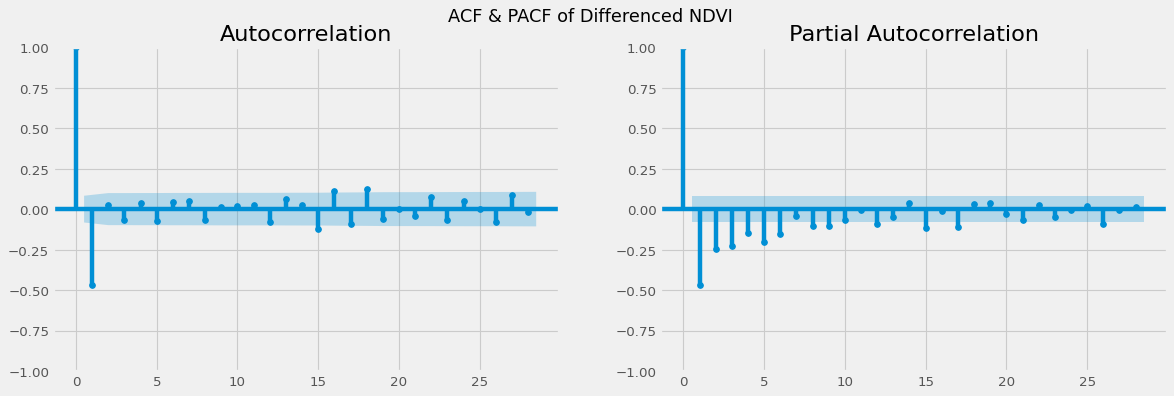

In [63]:
# Import packages
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# First difference NDVI (to address any non-stationarity)
weekly["NDVI_diff"] = weekly["ndvi"].diff()
weekly.dropna(inplace=True)  # Drop NaN from differencing

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), dpi=80)
plot_acf(weekly['NDVI_diff'], ax=ax1)
plot_pacf(weekly['NDVI_diff'], method='ywm', ax=ax2)
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.suptitle('ACF & PACF of Differenced NDVI', fontsize=16)
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

def mean_absolute_percentage_error(y_true, y_pred):
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [65]:
# Import packages
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go


# Build SARIMA model on raw NDVI values
model = ARIMA(ndvi_train, order=(10, 1, 10),
              seasonal_order=(1, 1, 1, 52)).fit()  # 52 = weekly seasonality
forecasts = model.forecast(len(weekly_test))

# Calculate error metrics
true = ndvi_test.values
pred = forecasts.values  # SARIMA's forecast output
mse = mean_squared_error(true, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true, pred)
mape = mean_absolute_percentage_error(true, pred)

# Print the metrics
print("📉 SARIMA Evaluation Metrics:")
print(f"MSE  = {mse:.6f}")
print(f"RMSE = {rmse:.6f}")
print(f"MAE  = {mae:.6f}")
print(f"MAPE: {mape:.6f}")


# Forecast plotting function
def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot NDVI forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=weekly_train['date'], y=ndvi_train, name='Train'))
    fig.add_trace(go.Scatter(x=weekly_test['date'], y=ndvi_test, name='Test'))
    fig.add_trace(go.Scatter(x=weekly_test['date'], y=forecasts, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=f"{title} | MSE: {mse:.3f} | MAE: {mae:.3f}",
                      width=650, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='NDVI', yaxis=dict(range=[0, 1]))

    return fig.show()

# Plot the NDVI forecasts
plot_forecasts(forecasts, 'SARIMA Forecast')

📉 SARIMA Evaluation Metrics:
MSE  = 0.005430
RMSE = 0.073686
MAE  = 0.059340
MAPE: 13.647985


### Monthly

In [82]:
# Split train and test sets
monthly.reset_index(inplace=True)
monthly_train = monthly.iloc[:-int(len(monthly) * 0.2)]
monthly_test = monthly.iloc[-int(len(monthly) * 0.2):]
monthly.set_index('date', inplace=True)

In [83]:
ndvi_train = monthly_train['ndvi']
ndvi_test = monthly_test['ndvi']

display(ndvi_train.head())
display(ndvi_test.head())
display(ndvi_train.info())
display(ndvi_test.info())

,ndvi
0,0.364194
1,0.403667
2,0.390000
3,0.436129
4,0.522000


,ndvi
103,0.516429
104,0.489032
105,0.430667
106,0.454839
107,0.370333


<class 'pandas.core.series.Series'>
RangeIndex: 103 entries, 0 to 102
Series name: ndvi
Non-Null Count  Dtype  
--------------  -----  
103 non-null    float64
dtypes: float64(1)
memory usage: 956.0 bytes


None

<class 'pandas.core.series.Series'>
RangeIndex: 25 entries, 103 to 127
Series name: ndvi
Non-Null Count  Dtype  
--------------  -----  
25 non-null     float64
dtypes: float64(1)
memory usage: 332.0 bytes


None

In [84]:
def plot_ndvi(df: pd.DataFrame,
              y: str) -> None:
    """General function to plot the NDVI data."""
    df.reset_index(inplace=True)
    fig = px.line(df, x='date', y=y, labels={'date': 'Date'})
    fig.update_layout(template="simple_white", font=dict(size=18), title_text='Monthly NDVI Time Series',
                      width=650, title_x=0.5, height=400, yaxis=dict(range=[0, 1]))

    return fig.show()


# Plot the NDVI data
plot_ndvi(df=monthly, y='ndvi')
monthly = monthly.set_index('date')

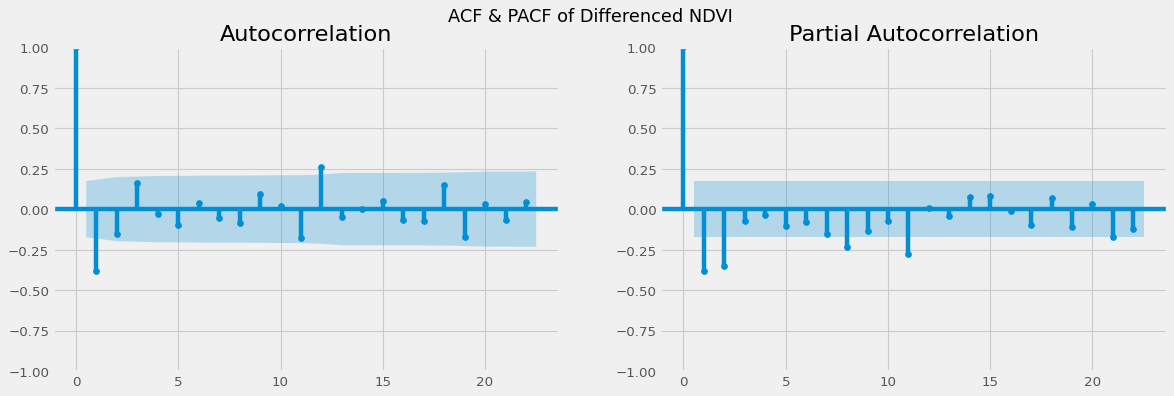

In [85]:
# Import packages
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

# First difference NDVI (to address any non-stationarity)
monthly["NDVI_diff"] = monthly["ndvi"].diff()
monthly.dropna(inplace=True)  # Drop NaN from differencing

# Plot ACF and PACF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5), dpi=80)
plot_acf(monthly['NDVI_diff'], ax=ax1)
plot_pacf(monthly['NDVI_diff'], method='ywm', ax=ax2)
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.suptitle('ACF & PACF of Differenced NDVI', fontsize=16)
plt.show()

In [86]:
# # Weekly NDVI — use yearly seasonality (52 weeks)
# from pmdarima import auto_arima

# model = auto_arima(ndvi_weekly,
#                    exogenous=exog_scaled,  # must match in shape & index
#                    seasonal=True,
#                    m=12,  # or 12 if monthly
#                    trace=True,
#                    suppress_warnings=True,
#                    stepwise=True)


# print(model.summary())

In [87]:
# Import packages
from statsmodels.tsa.arima.model import ARIMA
import plotly.graph_objects as go


# Build SARIMA model on raw NDVI values
model = ARIMA(ndvi_train, order=(10, 1, 10),
              seasonal_order=(1, 1, 1, 12)).fit()  # 12 = monthly seasonality
forecasts = model.forecast(len(monthly_test))

# Calculate error metrics
true = ndvi_test.values
pred = forecasts.values  # SARIMA's forecast output
mse = mean_squared_error(true, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true, pred)
mape = mean_absolute_percentage_error(true, pred)

# Print the metrics
print("📉 SARIMA Evaluation Metrics:")
print(f"MSE  = {mse:.6f}")
print(f"RMSE = {rmse:.6f}")
print(f"MAE  = {mae:.6f}")
print(f"MAPE: {mape:.6f}")


# Forecast plotting function
def plot_forecasts(forecasts: list[float], title: str) -> None:
    """Function to plot NDVI forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=monthly_train['date'], y=ndvi_train, name='Train'))
    fig.add_trace(go.Scatter(x=monthly_test['date'], y=ndvi_test, name='Test'))
    fig.add_trace(go.Scatter(x=monthly_test['date'], y=forecasts, name='Forecast'))
    fig.update_layout(
        template="simple_white",
        font=dict(size=18),
        title=dict(text=f"{title} | MSE: {mse:.3f} | MAE: {mae:.3f}", x=0.5),
        width=650,
        height=400,
        xaxis_title='Date',
        yaxis_title='NDVI',
        yaxis=dict(range=[0, 1])
    )

    return fig.show()

# Plot the NDVI forecasts
plot_forecasts(forecasts, 'SARIMA Forecast')

📉 SARIMA Evaluation Metrics:
MSE  = 0.001743
RMSE = 0.041749
MAE  = 0.033403
MAPE: 7.363109


# Harmonic Regression

In [98]:
import pandas as pd
import numpy as np
import pmdarima as pm
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import plotly.graph_objects as go

# Load your daily NDVI data
ndvi_data.set_index('date', inplace=True)

In [99]:
# Ensure all values are strictly positive for Box-Cox
ndvi_data['ndvi_shifted'] = ndvi_data['ndvi'] + 1e-2  # adds a tiny positive offset

# Box-Cox transformation for stability
ndvi_data['NDVI_Boxcox'], lam = boxcox(ndvi_data['ndvi_shifted'])

# Create Fourier terms for weekly and yearly seasonality
def generate_fourier_terms(df, period, order, prefix):
    t = np.arange(len(df))
    for k in range(1, order + 1):
        df[f'{prefix}_sin_{k}'] = np.sin(2 * np.pi * k * t / period)
        df[f'{prefix}_cos_{k}'] = np.cos(2 * np.pi * k * t / period)
    return df

# Use up to 3 harmonics for weekly and 8 for yearly
ndvi_data = generate_fourier_terms(ndvi_data, period=7, order=3, prefix='weekly')
ndvi_data = generate_fourier_terms(ndvi_data, period=365, order=8, prefix='yearly')

In [100]:
fourier_cols = [col for col in ndvi_data.columns if col.startswith('weekly') or col.startswith('yearly')]

# Train/Test Split (e.g., last 20% as test)
train_size = int(len(ndvi_data) * 0.8)
train, test = ndvi_data.iloc[:train_size], ndvi_data.iloc[train_size:]


In [101]:
# Fit ARIMA model
model = pm.auto_arima(train['NDVI_Boxcox'],
                      X=train[fourier_cols],
                      seasonal=False,
                      stepwise=True,
                      suppress_warnings=True)

# Forecast
boxcox_preds = model.predict(n_periods=len(test), X=test[fourier_cols])
preds = inv_boxcox(boxcox_preds, lam)

# Calculate evaluation metrics
true = test['ndvi_shifted'].values
mse = mean_squared_error(true, preds)
rmse = np.sqrt(mse)
mae = mean_absolute_error(true, preds)

# Print metrics
print("📉 Harmonic Regression Evaluation Metrics:")
print(f"MSE  = {mse:.6f}")
print(f"RMSE = {rmse:.6f}")
print(f"MAE  = {mae:.6f}")



📉 Harmonic Regression Evaluation Metrics:
MSE  = 0.023533
RMSE = 0.153406
MAE  = 0.126044


In [102]:
# Plot
def plot_forecasts(forecasts, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['ndvi'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['ndvi'], name='Test'))
    fig.add_trace(go.Scatter(x=test.index, y=forecasts, name='Forecast'))
    fig.update_layout(template="simple_white", font=dict(size=16), title_text=f"{title} | MSE: {mse:.3f} | MAE: {mae:.3f}",
                      title_x=0.5, width=800, height=450,
                      xaxis_title="Date", yaxis_title="ndvi")
    fig.show()

plot_forecasts(preds, 'NDVI Forecast with Harmonic Regression')


# Prophet

In [103]:
from prophet import Prophet

In [104]:
ndvi_monthly.head()

,ndvi
date,
2014-05-31,0.437742
2014-06-30,0.387000
2014-07-31,0.364194
2014-08-31,0.403667
2014-09-30,0.390000


In [106]:
ndvi_data = ndvi_monthly.copy()
ndvi_data.head()

,ndvi
date,
2014-05-31,0.437742
2014-06-30,0.387000
2014-07-31,0.364194
2014-08-31,0.403667
2014-09-30,0.390000


In [107]:
import seaborn as sns

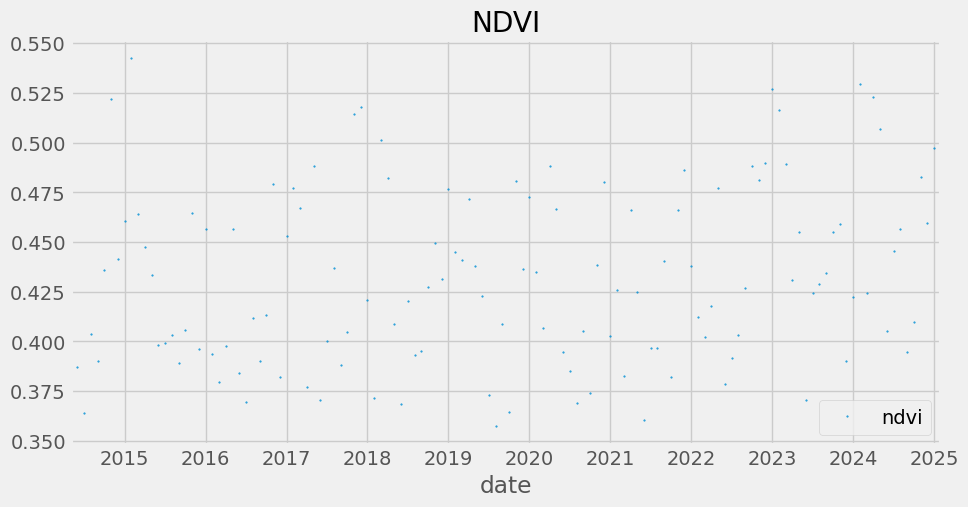

In [108]:
color_pal = sns.color_palette()
ndvi_data.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[0],
          title='NDVI')
plt.show()

In [109]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=['Monday','Tuesday',
                                        'Wednesday',
                                        'Thursday','Friday',
                                        'Saturday','Sunday'],
                            ordered=True)

def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['weekday'] = df['date'].dt.day_name()
    df['weekday'] = df['weekday'].astype(cat_type)
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['date_offset'] = (df.date.dt.month*100 + df.date.dt.day - 320)%1300

    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300],
                          labels=['Winter', 'Fall', 'Summer', 'Spring']
                   )
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear','weekday',
           'season']]
    if label:
        y = df[label]
        return X, y
    return X

X, y = create_features(ndvi_data, label='ndvi')
features_and_target = pd.concat([X, y], axis=1)


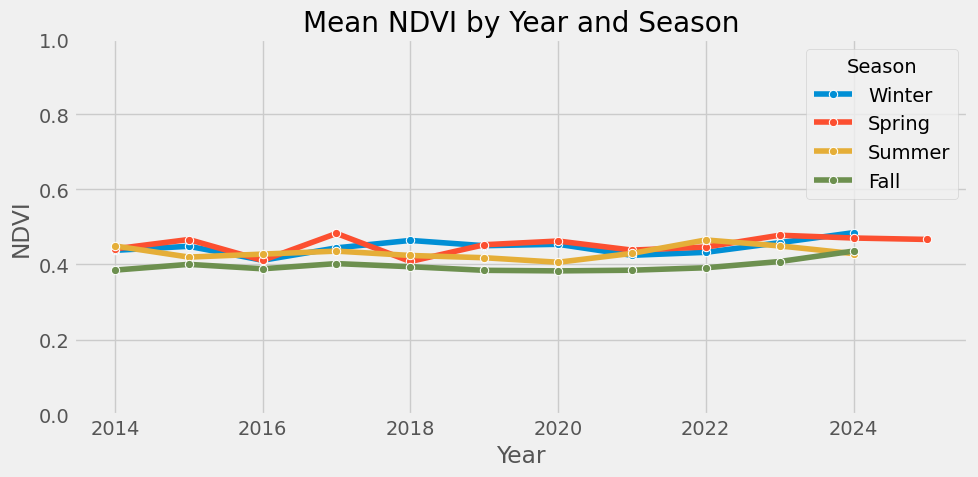

In [117]:
# Group by year and season
seasonal_ndvi = (
    features_and_target
    .dropna(subset=['ndvi', 'season'])  # drop missing NDVI/season
    .groupby(['year', 'season'])['ndvi']
    .mean()
    .reset_index()
)

# Sort season so the legend is consistent
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

plt.figure(figsize=(10, 5))
sns.lineplot(data=seasonal_ndvi, x='year', y='ndvi', hue='season',
             marker='o', hue_order=season_order)
plt.title("Mean NDVI by Year and Season")
plt.xlabel("Year")
plt.ylabel("NDVI")
plt.ylim(0, 1)
plt.grid(True)
plt.legend(title="Season")
plt.tight_layout()
plt.show()


In [111]:
ndvi_train = ndvi_monthly.iloc[:-int(len(ndvi_monthly) * 0.2)]
ndvi_test = ndvi_monthly.iloc[-int(len(ndvi_monthly) * 0.2):]

In [112]:
# # Plot train and test so you can see where we have split
# ndvi_test \
#     .rename(columns={'ndvi': 'TEST SET'}) \
#     .join(ndvi_train.rename(columns={'ndvi': 'TRAINING SET'}),
#           how='outer') \
#     .plot(figsize=(10, 5), title='NDVI', style='.', ms=1)
# plt.show()


In [113]:
# Format data for prophet model using ds and y
ndvi_train_prophet = ndvi_train.reset_index() \
    .rename(columns={'date':'ds',
                     'ndvi':'y'})

In [114]:
model = Prophet()
model.fit(ndvi_train_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6kzar02t/8vjusd3q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6kzar02t/r6rg9eip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4866', 'data', 'file=/tmp/tmp6kzar02t/8vjusd3q.json', 'init=/tmp/tmp6kzar02t/r6rg9eip.json', 'output', 'file=/tmp/tmp6kzar02t/prophet_modela0_nvdsx/prophet_model-20250327012849.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:28:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:28:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [115]:
# Predict on test set with model
ndvi_test_prophet = ndvi_test.reset_index() \
    .rename(columns={'date':'ds',
                     'ndvi':'y'})

ndvi_test_fcst = model.predict(ndvi_test_prophet)

In [116]:
ndvi_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-31,0.421623,0.407296,0.484501,0.421623,0.421623,0.026122,0.026122,0.026122,0.026122,0.026122,0.026122,0.0,0.0,0.0,0.447745
1,2023-02-28,0.421606,0.404444,0.485612,0.421606,0.421607,0.023469,0.023469,0.023469,0.023469,0.023469,0.023469,0.0,0.0,0.0,0.445076
2,2023-03-31,0.421588,0.403697,0.480532,0.421586,0.421590,0.022920,0.022920,0.022920,0.022920,0.022920,0.022920,0.0,0.0,0.0,0.444508
3,2023-04-30,0.421569,0.398677,0.477671,0.421566,0.421572,0.017544,0.017544,0.017544,0.017544,0.017544,0.017544,0.0,0.0,0.0,0.439114
4,2023-05-31,0.421551,0.382005,0.460379,0.421545,0.421555,0.001259,0.001259,0.001259,0.001259,0.001259,0.001259,0.0,0.0,0.0,0.422810


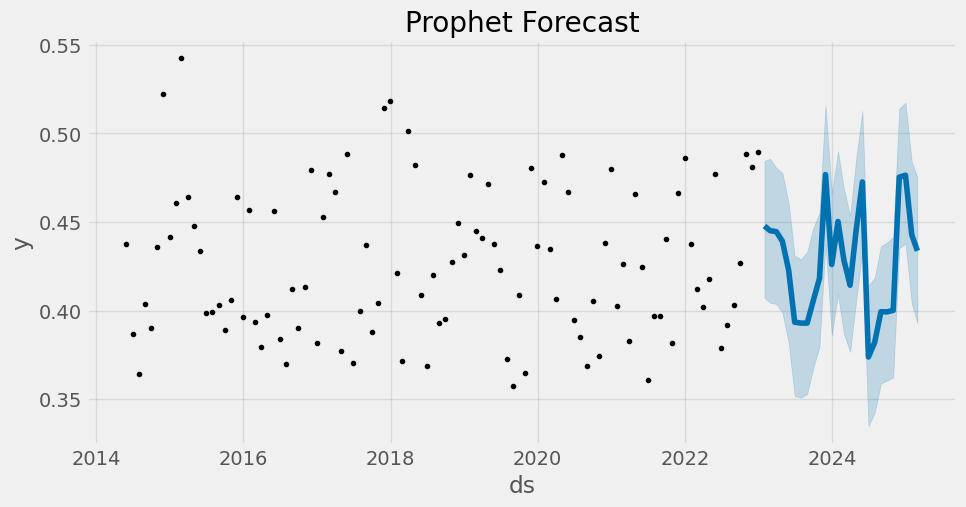

In [118]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(ndvi_test_fcst, ax=ax)
ax.set_title('Prophet Forecast')
plt.show()

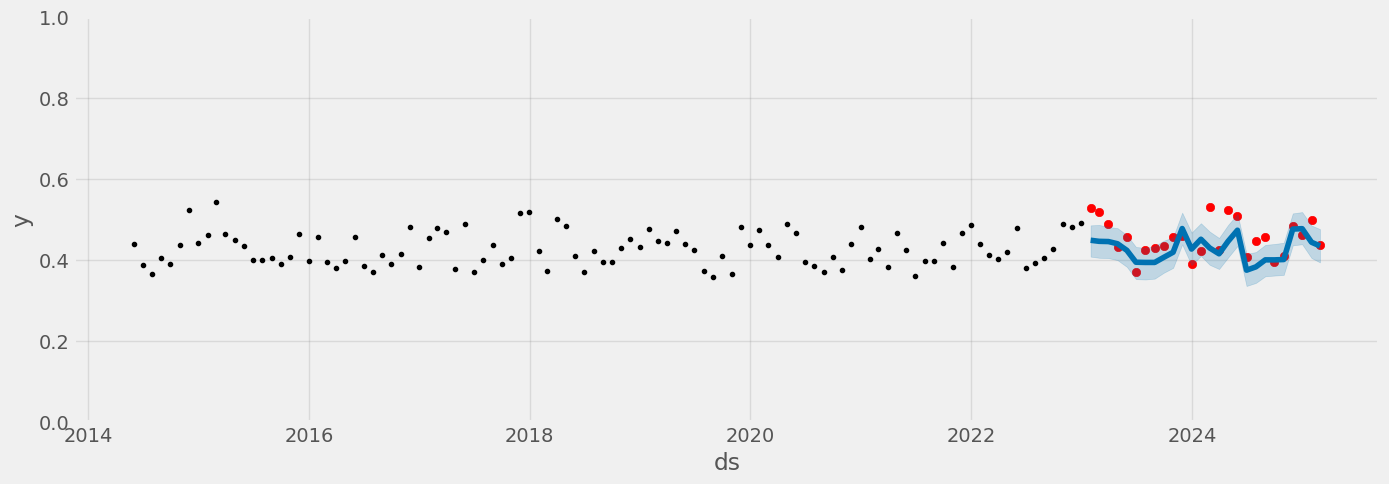

In [119]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(15, 5))
ax.scatter(ndvi_test.index, ndvi_test['ndvi'], color='r')
# Set y-axis limits to 0-1 for NDVI scale
ax.set_ylim(0, 1)
fig = model.plot(ndvi_test_fcst, ax=ax)

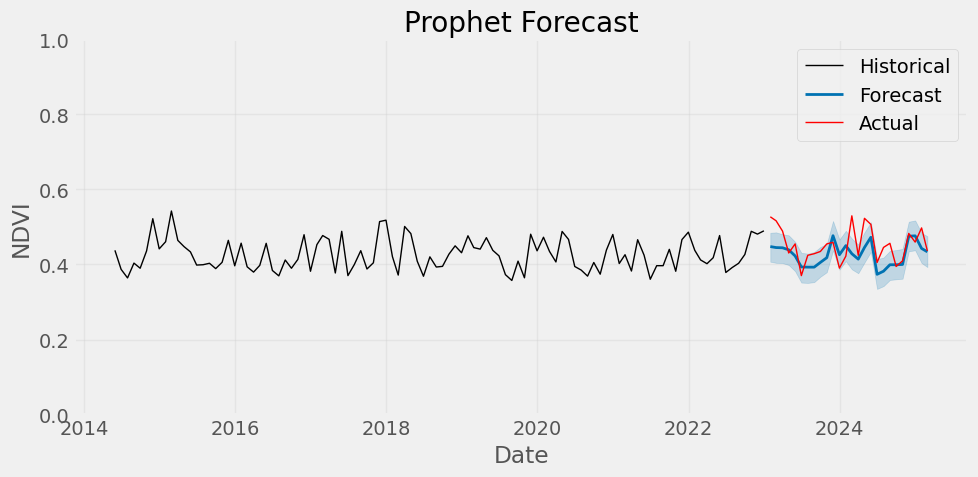

In [120]:
# Option 1: Create a custom plot that uses lines for everything
fig, ax = plt.subplots(figsize=(10, 5))

# Plot historical data as a line instead of dots
ax.plot(ndvi_train_prophet['ds'], ndvi_train_prophet['y'],
        '-', color='black', linewidth=1, label='Historical')

# Plot forecast with confidence interval
ax.plot(ndvi_test_fcst['ds'], ndvi_test_fcst['yhat'],
        '-', color='#0072B2', linewidth=2, label='Forecast')
ax.fill_between(ndvi_test_fcst['ds'],
                ndvi_test_fcst['yhat_lower'],
                ndvi_test_fcst['yhat_upper'],
                color='#0072B2', alpha=0.2)

# Add actual test data
ax.plot(ndvi_test_prophet['ds'], ndvi_test_prophet['y'],
        '-', color='red', linewidth=1, label='Actual')

ax.set_title('Prophet Forecast')
ax.set_xlabel('Date')
ax.set_ylabel('NDVI')
# Set y-axis limits to 0-1 for NDVI scale
ax.set_ylim(0, 1)
ax.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [121]:
print(f"MSE: {round(mean_squared_error(y_true=ndvi_test['ndvi'], y_pred=ndvi_test_fcst['yhat']),3)}")
print(f"MAE: {round(mean_absolute_error(y_true=ndvi_test['ndvi'], y_pred=ndvi_test_fcst['yhat']),3)}")
print(f"MAPE: {round(mean_absolute_percentage_error(y_true=ndvi_test['ndvi'],y_pred=ndvi_test_fcst['yhat']),3)}")

MSE: 0.002
MAE: 0.036
MAPE: 7.739


# XGBoost

In [122]:
# !pip install xgboost

In [145]:
data.head()

,tide_verified,wind_speed,turbidity,ndvi
date,,,,
2014-05-01,0.106201,0.255725,-0.640075,0.23
2014-05-02,0.554358,0.016838,-0.635610,0.33
2014-05-03,0.905089,-0.619118,-0.617753,0.40
2014-05-04,-0.614747,0.346114,-0.617753,0.65
2014-05-05,-0.965478,0.588230,-0.555251,0.73


In [146]:
from sklearn.preprocessing import StandardScaler

# Add after loading the data and before creating lag features
# Standardize the features
scaler = StandardScaler()
features_to_scale = ['tide_verified', 'turbidity', 'wind_speed']

weekly_scaled = weekly.copy()
monthly_scaled = monthly.copy()

# Create a DataFrame for scaled features
weekly_scaled[features_to_scale] = scaler.fit_transform(weekly_scaled[features_to_scale])
monthly_scaled[features_to_scale] = scaler.fit_transform(monthly_scaled[features_to_scale])

In [147]:
display(weekly_scaled)
display(monthly_scaled)

,tide_verified,wind_speed,turbidity,ndvi,NDVI_diff
date,,,,,
2014-05-11,-0.431803,0.961509,-0.593820,0.522857,0.120357
2014-05-18,-1.049575,2.141054,-0.644497,0.442857,-0.080000
2014-05-25,-0.951516,0.947673,-0.590925,0.514286,0.071429
2014-06-01,-0.631190,-0.078289,-1.030359,0.268571,-0.245714
2014-06-08,-0.647533,-0.561176,-0.797973,0.390000,0.121429
...,...,...,...,...,...
2025-02-02,1.016201,-1.087648,1.850943,0.520000,0.054286
2025-02-09,0.440921,-0.745891,2.393902,0.507143,-0.012857
2025-02-16,1.075036,-0.127408,1.354316,0.401429,-0.105714


,tide_verified,wind_speed,turbidity,ndvi,NDVI_diff
date,,,,,
2014-08-31,-0.039560,-1.373576,-1.277294,0.403667,0.039473
2014-09-30,0.319316,-1.217503,-1.348320,0.390000,-0.013667
2014-10-31,0.072125,0.017292,-1.353257,0.436129,0.046129
2014-11-30,-0.691986,1.484267,-0.880762,0.522000,0.085871
2014-12-31,-0.346394,0.039562,-0.680715,0.441613,-0.080387
...,...,...,...,...,...
2024-10-31,3.205019,1.790724,0.567343,0.409677,0.015011
2024-11-30,2.771082,1.028124,0.008834,0.482667,0.072989
2024-12-31,1.171639,0.951084,2.040973,0.459677,-0.022989


### Weekly

In [148]:
# Create lagged features (will be used for ML models)
for i in range(1, 8):
    weekly_scaled[f'tide_verified_lag_{i}'] = weekly_scaled['tide_verified'].shift(i)
    weekly_scaled[f'turbidity_lag_{i}'] = weekly_scaled['turbidity'].shift(i)
    weekly_scaled[f'wind_speed_lag_{i}'] = weekly_scaled['wind_speed'].shift(i)
    weekly_scaled[f'ndvi_lag_{i}'] = weekly_scaled['ndvi'].shift(i)


# Split data into train and test (last 20% for testing)
train_size = int(len(weekly_scaled) * 0.8)
train_data = weekly_scaled.iloc[:train_size]
test_data = weekly_scaled.iloc[train_size:]

train_with_lags_weekly = weekly_scaled.iloc[:train_size]
test_with_lags_weekly = weekly_scaled.iloc[train_size:]

display(train_with_lags_weekly.head())
display(test_with_lags_weekly.head())

,tide_verified,wind_speed,turbidity,ndvi,NDVI_diff,tide_verified_lag_1,turbidity_lag_1,wind_speed_lag_1,ndvi_lag_1,tide_verified_lag_2,...,wind_speed_lag_5,ndvi_lag_5,tide_verified_lag_6,turbidity_lag_6,wind_speed_lag_6,ndvi_lag_6,tide_verified_lag_7,turbidity_lag_7,wind_speed_lag_7,ndvi_lag_7
date,,,,,,,,,,,,,,,,,,,,,
2014-05-11,-0.431803,0.961509,-0.593820,0.522857,0.120357,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-18,-1.049575,2.141054,-0.644497,0.442857,-0.080000,-0.431803,-0.593820,0.961509,0.522857,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-05-25,-0.951516,0.947673,-0.590925,0.514286,0.071429,-1.049575,-0.644497,2.141054,0.442857,-0.431803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-01,-0.631190,-0.078289,-1.030359,0.268571,-0.245714,-0.951516,-0.590925,0.947673,0.514286,-1.049575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-08,-0.647533,-0.561176,-0.797973,0.390000,0.121429,-0.631190,-1.030359,-0.078289,0.268571,-0.951516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,tide_verified,wind_speed,turbidity,ndvi,NDVI_diff,tide_verified_lag_1,turbidity_lag_1,wind_speed_lag_1,ndvi_lag_1,tide_verified_lag_2,...,wind_speed_lag_5,ndvi_lag_5,tide_verified_lag_6,turbidity_lag_6,wind_speed_lag_6,ndvi_lag_6,tide_verified_lag_7,turbidity_lag_7,wind_speed_lag_7,ndvi_lag_7
date,,,,,,,,,,,,,,,,,,,,,
2023-01-08,-0.526594,0.309127,0.544946,0.575714,0.144286,-0.650802,-0.265873,-0.350865,0.431429,-0.196462,...,1.119935,0.477143,0.342863,-0.711823,-0.045774,0.488571,-0.268372,-0.412110,0.987106,0.534286
2023-01-15,-1.177051,0.230952,0.294460,0.628571,0.052857,-0.526594,0.544946,0.309127,0.575714,-0.650802,...,0.471012,0.618571,-0.049373,-0.679970,1.119935,0.477143,0.342863,-0.711823,-0.045774,0.488571
2023-01-22,-0.019956,-0.935449,0.335725,0.501429,-0.127143,-1.177051,0.294460,0.230952,0.628571,-0.526594,...,-0.779098,0.424286,0.071566,-0.551108,0.471012,0.618571,-0.049373,-0.679970,1.119935,0.477143
2023-01-29,-1.183589,0.782329,1.053879,0.418571,-0.082857,-0.019956,0.335725,-0.935449,0.501429,-1.177051,...,0.437805,0.438571,0.558592,-0.501155,-0.779098,0.424286,0.071566,-0.551108,0.471012,0.618571
2023-02-05,-1.082261,-0.271306,0.800498,0.481429,0.062857,-1.183589,1.053879,0.782329,0.418571,-0.019956,...,-0.350865,0.431429,-0.196462,-0.151490,0.437805,0.438571,0.558592,-0.501155,-0.779098,0.424286


In [149]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# XGBoost with environmental variables
def train_xgboost(train_data, test_data):
    # Features and target
    features = [col for col in train_data.columns if col != 'ndvi']
    X_train = train_data[features]
    y_train = train_data['ndvi']
    X_test = test_data[features]

    # Train model
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(test_data['ndvi'], predictions))
    mae = mean_absolute_error(test_data['ndvi'], predictions)
    r2 = r2_score(test_data['ndvi'], predictions)

    # Feature importance
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(f"XGBoost RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")
    print("\nTop 10 important features:")
    print(feature_importance.head(10))

    return predictions, model


In [150]:
print("\nTraining XGBoost model...")
xgb_pred, xgb_model = train_xgboost(train_with_lags_weekly, test_with_lags_weekly)


Training XGBoost model...
XGBoost RMSE: 0.0201, MAE: 0.0135, R²: 0.9301

Top 10 important features:
                Feature  Importance
3             NDVI_diff    0.501186
7            ndvi_lag_1    0.279877
14     wind_speed_lag_3    0.018341
21      turbidity_lag_5    0.017954
4   tide_verified_lag_1    0.014762
22     wind_speed_lag_5    0.012862
6      wind_speed_lag_1    0.010404
29      turbidity_lag_7    0.009842
11           ndvi_lag_2    0.009771
25      turbidity_lag_6    0.009489


In [151]:
# True values
xgb_true = test_with_lags_weekly['ndvi'].values
xgb_pred = np.clip(xgb_pred, 0, 1)  # optional: keep predictions within 0-1

# Metrics
mse = mean_squared_error(xgb_true, xgb_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(xgb_true, xgb_pred)
mape = mean_absolute_percentage_error(xgb_true, xgb_pred)

print("📉 XGBoost Evaluation Metrics:")
print(f"MSE  = {mse:.6f}")
print(f"RMSE = {rmse:.6f}")
print(f"MAE  = {mae:.6f}")
print(f"MAPE = {mape:.6f}")


📉 XGBoost Evaluation Metrics:
MSE  = 0.000402
RMSE = 0.020060
MAE  = 0.013527
MAPE = 2.863495


In [152]:
# Create timeline (index)
xgb_dates = test_with_lags_weekly.index

def plot_forecasts(forecasts, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train_with_lags_weekly.index, y=train_with_lags_weekly['ndvi'], name='Train'))
    fig.add_trace(go.Scatter(x=xgb_dates, y=test_with_lags_weekly['ndvi'], name='Test'))
    fig.add_trace(go.Scatter(x=xgb_dates, y=forecasts, name='Forecast'))

    fig.update_layout(
        template="simple_white",
        font=dict(size=18),
        title=dict(text=f"{title} | MSE: {mse:.4f} | MAE: {mae:.4f}", x=0.5),
        width=650,
        height=400,
        xaxis_title='Date',
        yaxis_title='NDVI',
        yaxis=dict(range=[0, 1])
    )
    fig.show()

# Plot
plot_forecasts(xgb_pred, 'XGBoost Forecast')


### Monthly

In [140]:
# Create lagged features (will be used for ML models)
for i in range(1, 8):
    monthly_scaled[f'tide_verified_lag_{i}'] = monthly_scaled['tide_verified'].shift(i)
    monthly_scaled[f'turbidity_lag_{i}'] = monthly_scaled['turbidity'].shift(i)
    monthly_scaled[f'wind_speed_lag_{i}'] = monthly_scaled['wind_speed'].shift(i)
    monthly_scaled[f'ndvi_lag_{i}'] = monthly_scaled['ndvi'].shift(i)

# Split data into train and test (last 20% for testing)
train_size = int(len(monthly_scaled) * 0.8)
train_data = monthly_scaled.iloc[:train_size]
test_data = monthly_scaled.iloc[train_size:]

train_with_lags_monthly = monthly_scaled.iloc[:train_size]
test_with_lags_monthly = monthly_scaled.iloc[train_size:]

display(train_with_lags_monthly.head())
display(test_with_lags_monthly.head())

,tide_verified,wind_speed,turbidity,ndvi,NDVI_diff,tide_verified_lag_1,turbidity_lag_1,wind_speed_lag_1,ndvi_lag_1,tide_verified_lag_2,...,wind_speed_lag_5,ndvi_lag_5,tide_verified_lag_6,turbidity_lag_6,wind_speed_lag_6,ndvi_lag_6,tide_verified_lag_7,turbidity_lag_7,wind_speed_lag_7,ndvi_lag_7
date,,,,,,,,,,,,,,,,,,,,,
2014-08-31,-0.039560,-1.373576,-1.277294,0.403667,0.039473,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-30,0.319316,-1.217503,-1.348320,0.390000,-0.013667,-0.039560,-1.277294,-1.373576,0.403667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-31,0.072125,0.017292,-1.353257,0.436129,0.046129,0.319316,-1.348320,-1.217503,0.390000,-0.039560,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-30,-0.691986,1.484267,-0.880762,0.522000,0.085871,0.072125,-1.353257,0.017292,0.436129,0.319316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-12-31,-0.346394,0.039562,-0.680715,0.441613,-0.080387,-0.691986,-0.880762,1.484267,0.522000,0.072125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,tide_verified,wind_speed,turbidity,ndvi,NDVI_diff,tide_verified_lag_1,turbidity_lag_1,wind_speed_lag_1,ndvi_lag_1,tide_verified_lag_2,...,wind_speed_lag_5,ndvi_lag_5,tide_verified_lag_6,turbidity_lag_6,wind_speed_lag_6,ndvi_lag_6,tide_verified_lag_7,turbidity_lag_7,wind_speed_lag_7,ndvi_lag_7
date,,,,,,,,,,,,,,,,,,,,,
2023-01-31,-0.765714,-0.065614,0.623736,0.527097,0.037419,-0.128732,-0.489509,0.487606,0.489677,0.373064,...,-1.248343,0.403226,-0.034305,-0.767868,-0.774281,0.391935,0.298643,-0.574485,-1.581369,0.378667
2023-02-28,-1.019558,-0.287234,1.582151,0.516429,-0.010668,-0.765714,0.623736,-0.065614,0.527097,-0.128732,...,-0.724677,0.426667,0.404220,-0.741855,-1.248343,0.403226,-0.034305,-0.767868,-0.774281,0.391935
2023-03-31,-0.082319,-0.105964,1.747614,0.489032,-0.027396,-1.019558,1.582151,-0.287234,0.516429,-0.765714,...,0.244401,0.488387,1.420750,0.425575,-0.724677,0.426667,0.404220,-0.741855,-1.248343,0.403226
2023-04-30,-0.038733,-0.438961,1.697968,0.430667,-0.058366,-0.082319,1.747614,-0.105964,0.489032,-1.019558,...,0.550792,0.481000,0.725112,-0.778881,0.244401,0.488387,1.420750,0.425575,-0.724677,0.426667
2023-05-31,-0.027103,-1.128615,-0.053553,0.454839,0.024172,-0.038733,1.697968,-0.438961,0.430667,-0.082319,...,0.487606,0.489677,0.373064,-0.683183,0.550792,0.481000,0.725112,-0.778881,0.244401,0.488387


In [141]:
print("\nTraining XGBoost model...")
xgb_pred, xgb_model = train_xgboost(train_with_lags_monthly, test_with_lags_monthly)


Training XGBoost model...
XGBoost RMSE: 0.0270, MAE: 0.0198, R²: 0.6202

Top 10 important features:
                Feature  Importance
3             NDVI_diff    0.303533
7            ndvi_lag_1    0.128812
20  tide_verified_lag_5    0.108852
24  tide_verified_lag_6    0.087850
31           ndvi_lag_7    0.054832
8   tide_verified_lag_2    0.044135
14     wind_speed_lag_3    0.029735
30     wind_speed_lag_7    0.028692
6      wind_speed_lag_1    0.026565
1            wind_speed    0.020325


In [142]:
# True values
xgb_true = test_with_lags_monthly['ndvi'].values
xgb_pred = np.clip(xgb_pred, 0, 1)  # optional: keep predictions within 0-1

# Metrics
mse = mean_squared_error(xgb_true, xgb_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(xgb_true, xgb_pred)
mape = mean_absolute_percentage_error(xgb_true, xgb_pred)

print("📉 XGBoost Evaluation Metrics:")
print(f"MSE  = {mse:.6f}")
print(f"RMSE = {rmse:.6f}")
print(f"MAE  = {mae:.6f}")
print(f"MAPE = {mape:.6f}")

📉 XGBoost Evaluation Metrics:
MSE  = 0.000732
RMSE = 0.027046
MAE  = 0.019844
MAPE = 4.303486


In [143]:
# Create timeline (index)
xgb_dates = test_with_lags_monthly.index

def plot_forecasts(forecasts, title):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train_with_lags_monthly.index, y=train_with_lags_monthly['ndvi'], name='Train'))
    fig.add_trace(go.Scatter(x=xgb_dates, y=test_with_lags_monthly['ndvi'], name='Test'))
    fig.add_trace(go.Scatter(x=xgb_dates, y=forecasts, name='Forecast'))

    fig.update_layout(
        template="simple_white",
        font=dict(size=18),
        title=dict(text=f"{title} | MSE: {mse:.3f} | MAE: {mae:.3f}", x=0.5),
        width=650,
        height=400,
        xaxis_title='Date',
        yaxis_title='NDVI',
        yaxis=dict(range=[0, 1])
    )
    fig.show()

# Plot
plot_forecasts(xgb_pred, 'XGBoost Forecast')
